# Image Classification of CIFAR10 dataset using CNN  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    AveragePooling2D,
    Input,
)
from sklearn.metrics import confusion_matrix
import os

c:\Users\subin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from keras.datasets import cifar10

**Load the dataset from keras**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  # load the data

[2]


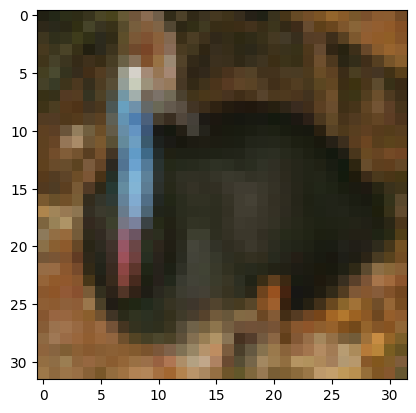

In [4]:
i = 2004
plt.imshow(X_train[i])
print(y_train[i])

**Data Visualization**

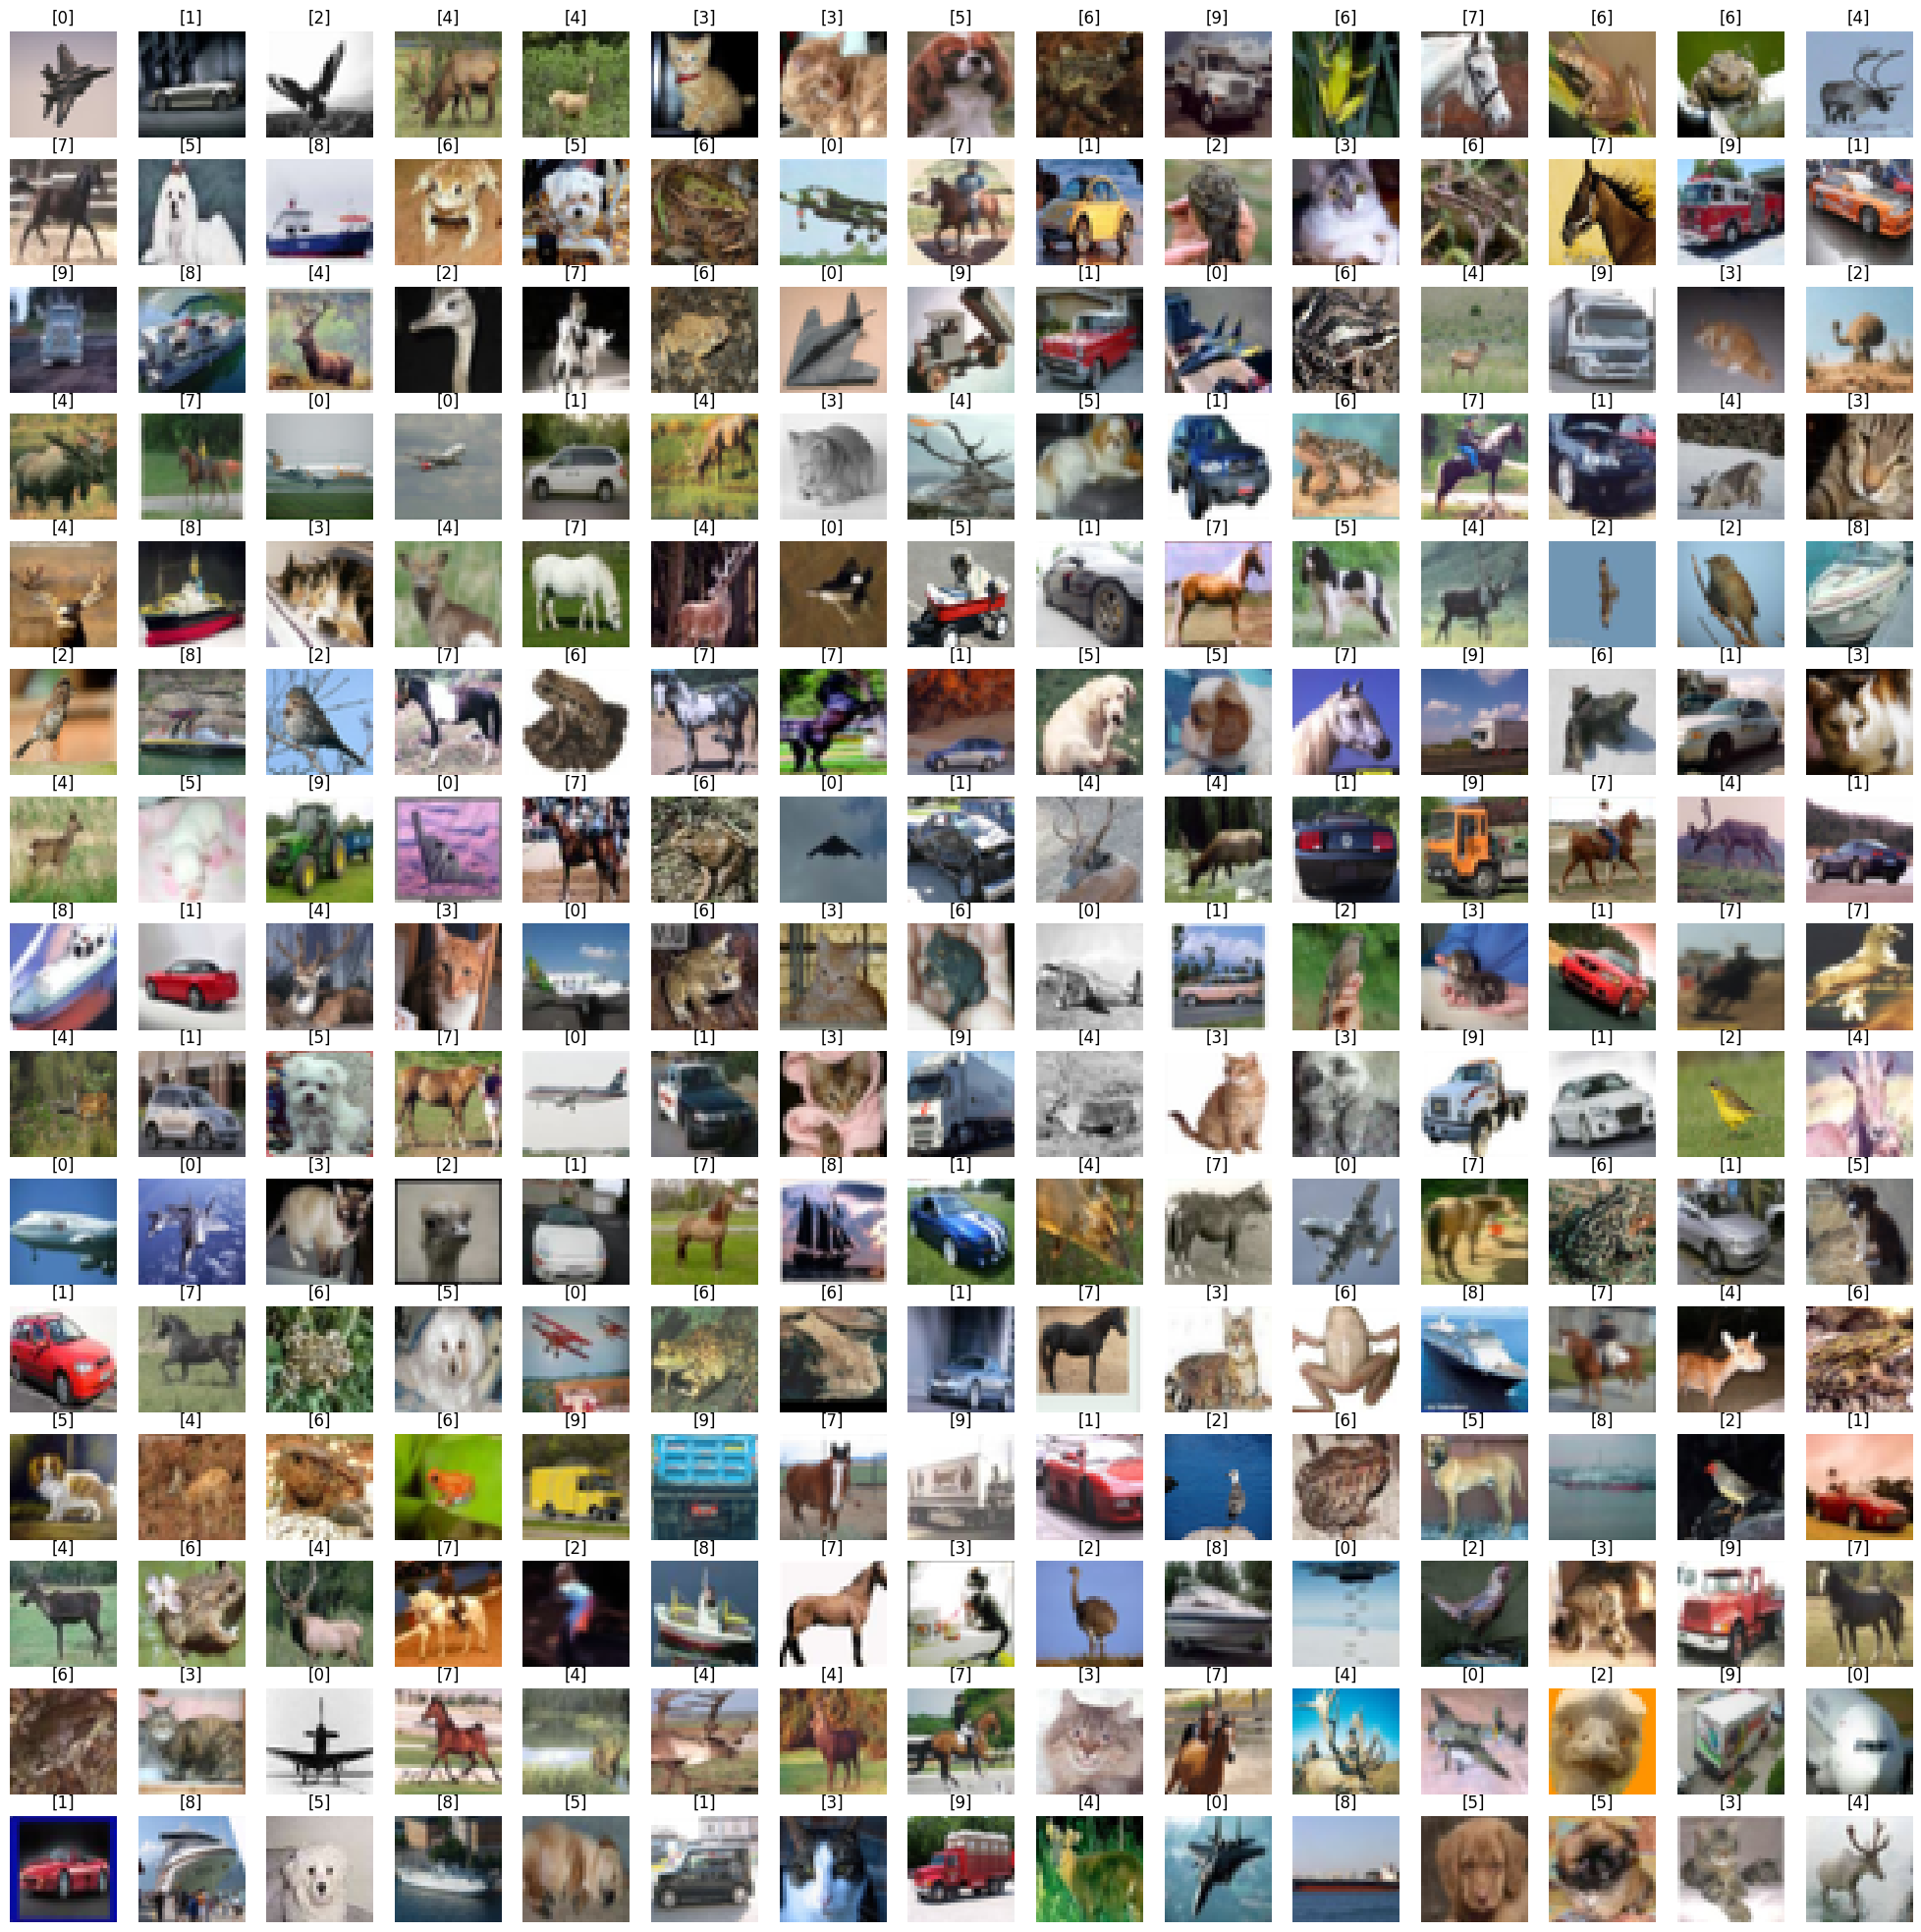

In [5]:
width = 15
length = 15
fig , axes = plt.subplots(length, width, figsize = (25,25))
axes = axes.ravel()
n = len(X_train)

for i in np.arange(0,length * width):
    index = np.random.randint(0, n) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])

**Data preparation**

In [6]:
X_train = X_train.astype('float32') # convert the data to float
X_test = X_test.astype('float32')

num_of_classes = 10 # number of classes
y_train = keras.utils.to_categorical(y_train, num_of_classes) # one hot encoding
y_test = keras.utils.to_categorical(y_test, num_of_classes) # one hot encoding

In [7]:
#normalizing the data
X_train = X_train/255 
X_test = X_test/255

In [8]:
X_train , X_test

(array([[[[0.23137255, 0.24313726, 0.24705882],
          [0.16862746, 0.18039216, 0.1764706 ],
          [0.19607843, 0.1882353 , 0.16862746],
          ...,
          [0.61960787, 0.5176471 , 0.42352942],
          [0.59607846, 0.49019608, 0.4       ],
          [0.5803922 , 0.4862745 , 0.40392157]],
 
         [[0.0627451 , 0.07843138, 0.07843138],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509805, 0.21568628],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117648, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215687, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941177, 0.19607843],
          [0.47058824, 0.32941177, 0.19607843],
          [0.42745098, 0.28627452, 0.16470589]],
 
         ...,
 
         [[0.8156863 , 0.6666667 , 0.3764706 ],
          [0.78823

In [9]:
input_shape = X_train.shape[1:] # input shape
input_shape 

(32, 32, 3)

**Training the model**

In [10]:
#Creating the model

model = Sequential()  # create a sequential model
model.add(Input(shape=input_shape))  # add an input layer
model.add(
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu")
)  # add a convolutional  layer
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
    )
)  # add a convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # add a max pooling layer
model.add(Dropout(rate=0.3))  # add a dropout layer
model.add(
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu")
)  # add a convolutional input layer
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu",
    )
)  # add a convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # add a max pooling layer
model.add(Dropout(rate=0.2))  # add a dropout layer

model.add(Flatten())  # add a flatten layer
model.add(Dense(units=512, activation="relu"))  # add a dense layer
model.add(Dense(units=512, activation="relu"))  # add a dense layer
model.add(Dense(units=num_of_classes, activation="softmax"))  # add the output layer

In [11]:
model.compile(
    "rmsprop", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"]
)  # compile the model

In [12]:
history = model.fit(
    X_train, y_train, batch_size=32, epochs=25, shuffle=True
)  # train the model

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3220 - loss: 1.8377
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5733 - loss: 1.2019
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6529 - loss: 0.9928
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6923 - loss: 0.8904
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7176 - loss: 0.8209


**Evaluate the model**

In [13]:
evaluation = model.evaluate(X_test, y_test)  # evaluate the model
print(f"Test Accuracy: {evaluation[1]}")  # print the test accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7193 - loss: 0.8428
Test Accuracy: 0.7146999835968018


In [14]:
predicted = model.predict(X_test)  # predict the classes
predicted_classes = np.argmax(predicted, axis=1)  # get the predicted classes
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [15]:
y_test = np.argmax(y_test, axis=1)  # get the true classes
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

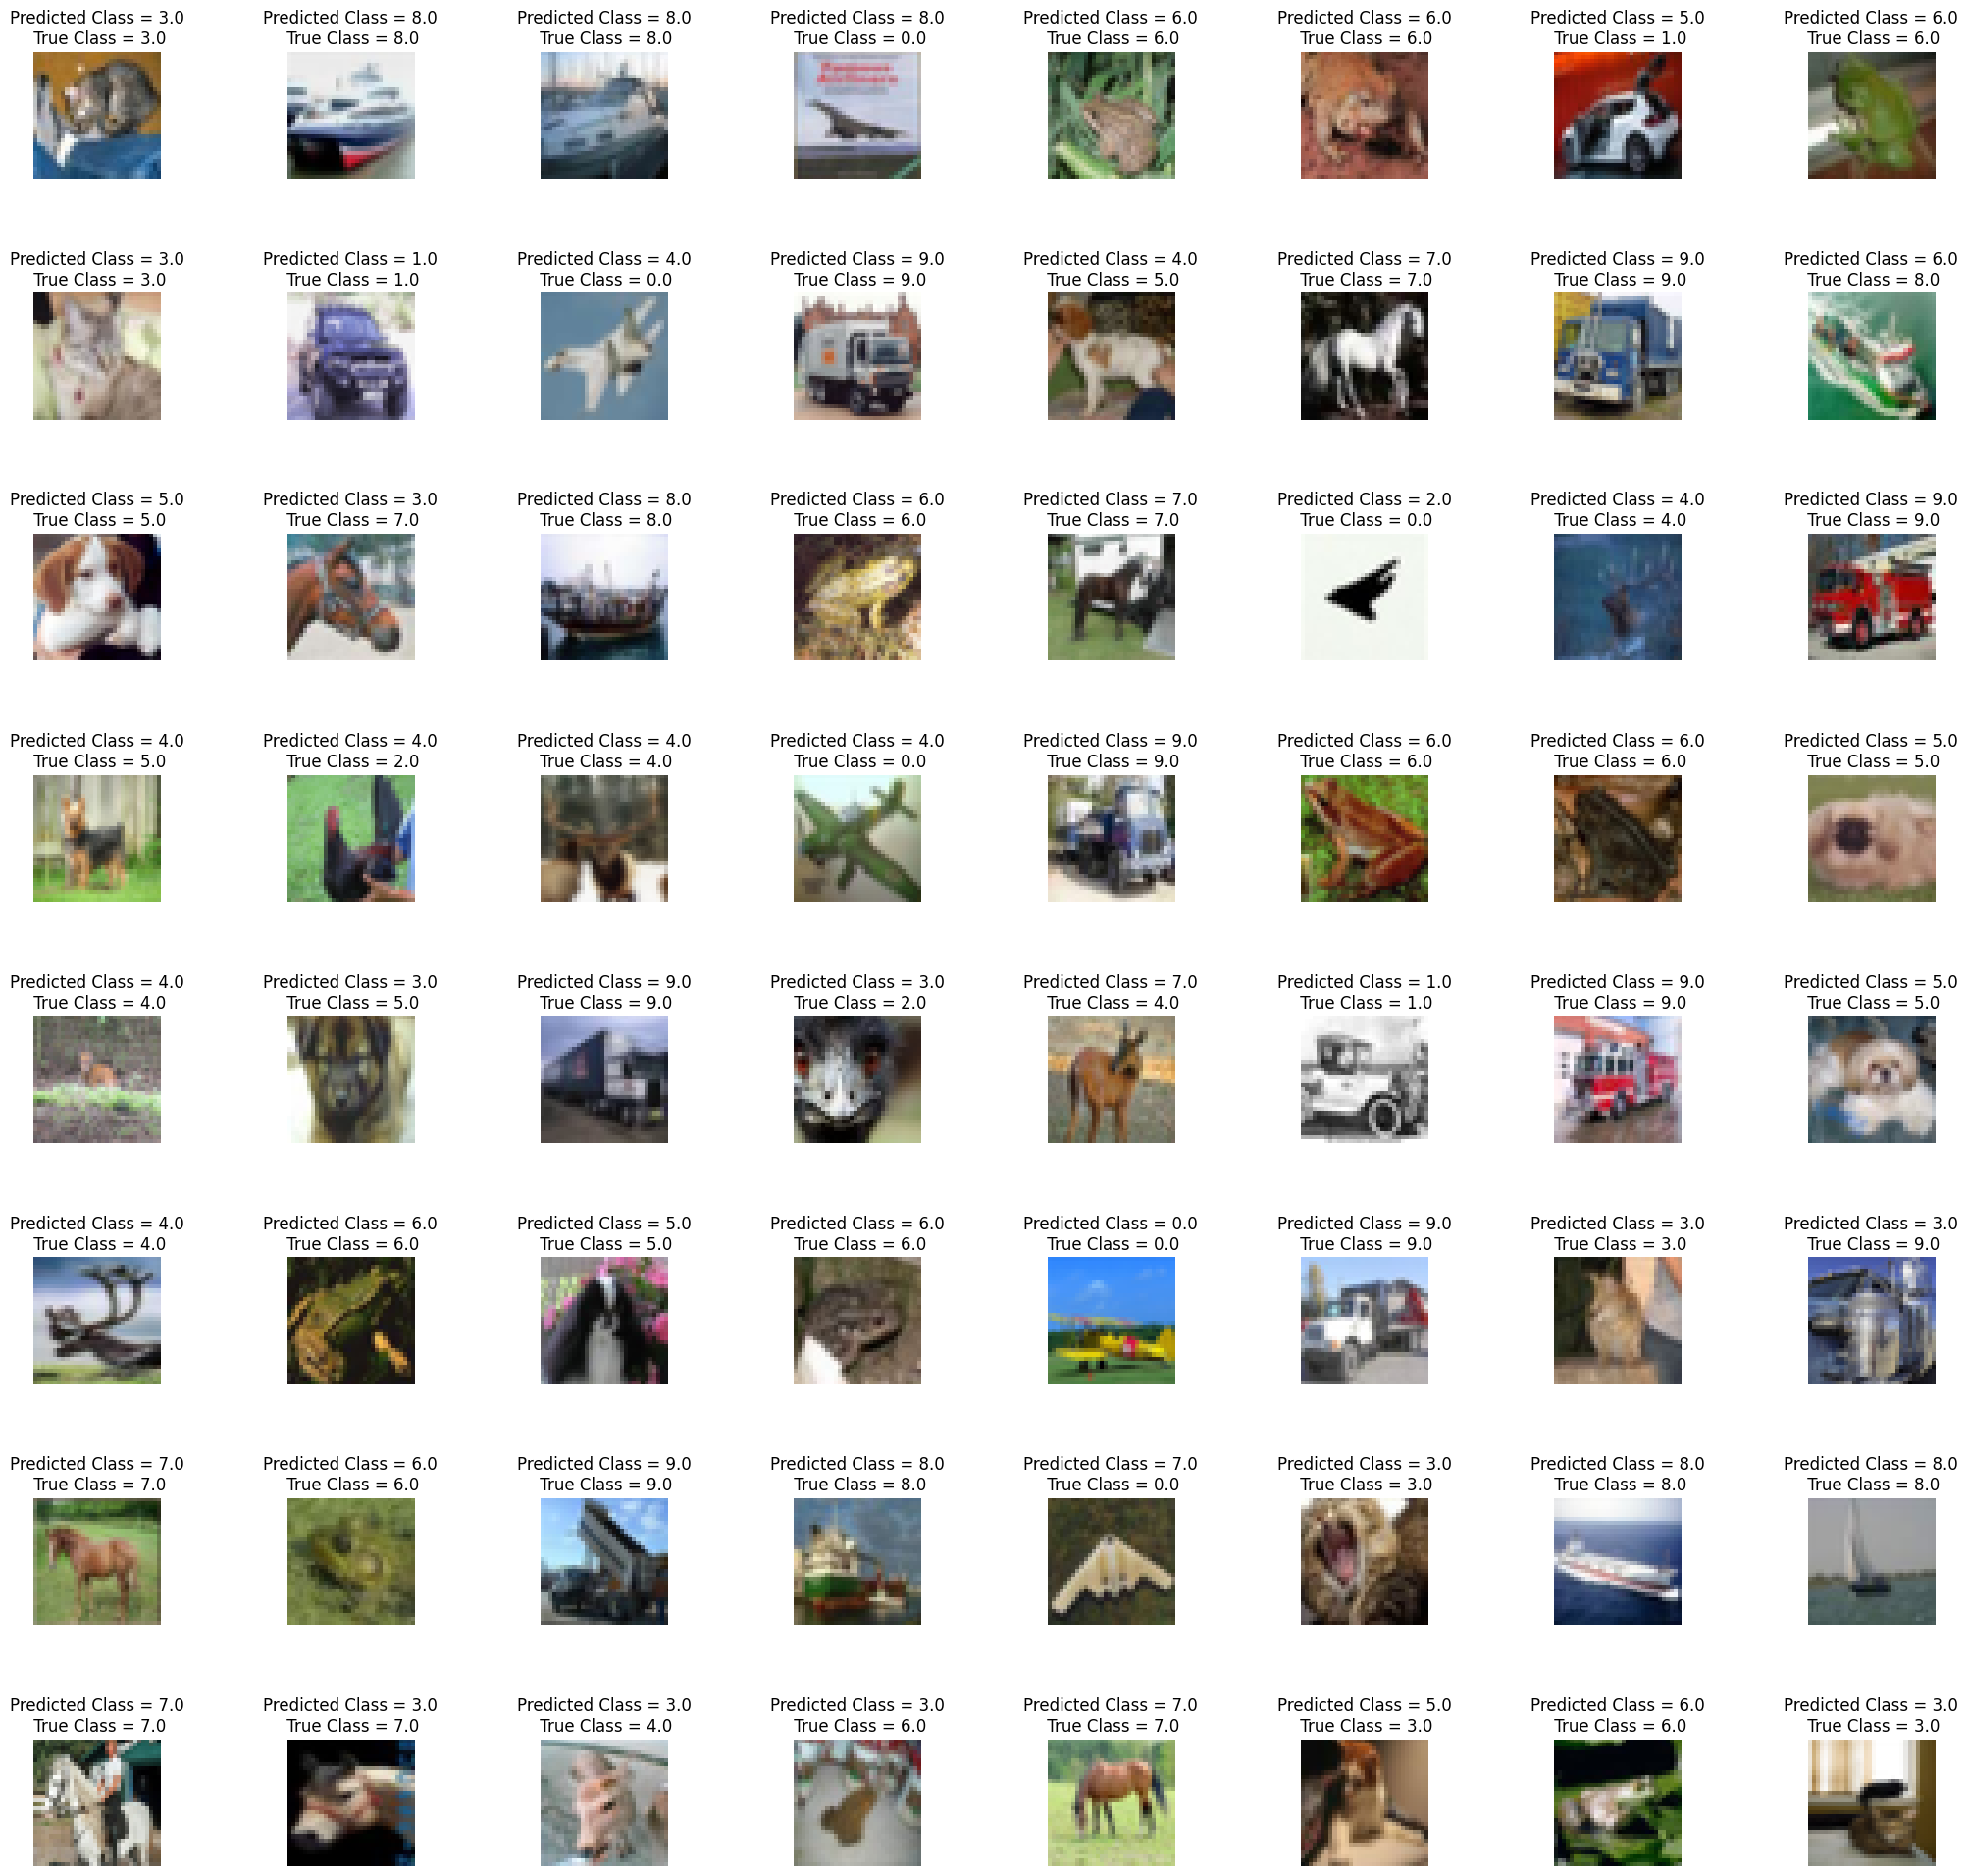

In [16]:
#Plot the images along with the predicted and true classes
l = 8
w = 8
fig, axes = plt.subplots(l, w, figsize=(25, 25))
axes = axes.ravel() 
for i in np.arange(0, l * w):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

<Axes: >

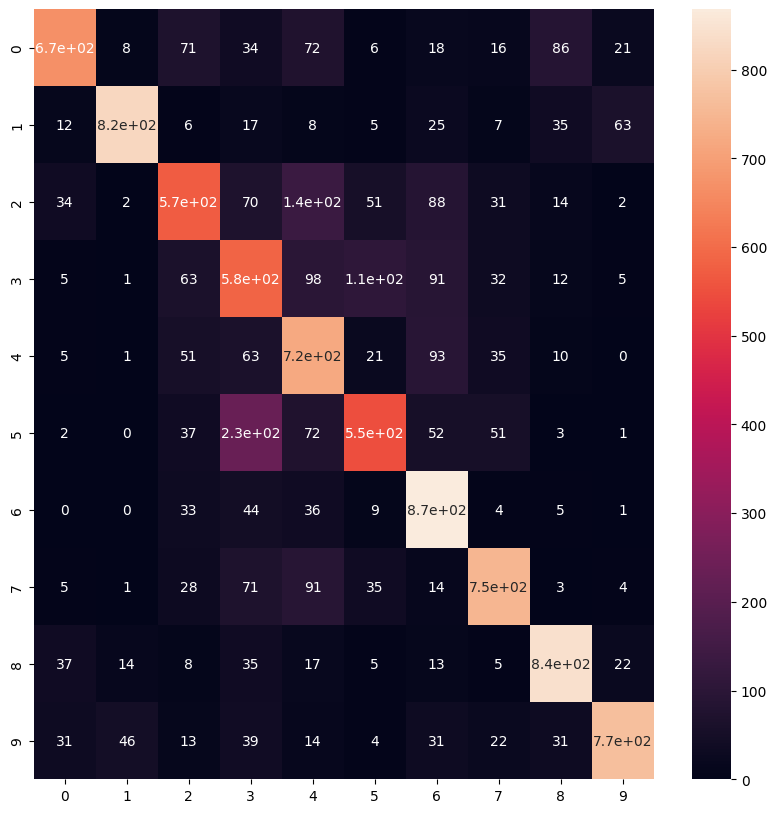

In [17]:
cm = confusion_matrix(y_test, predicted_classes)  # create a confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)

**Saving the model**

In [48]:
def save_model(model_name):
    directory = os.path.join(os.getcwd(), "models")  # create a directory


    if not os.path.isdir(directory):  # check if the directory exists


        os.mkdir(directory)  # create the directory if it does not exist


    path = os.path.join(
        directory, f"{model_name}.keras"
    )  # create a path to save the model


    model.save(path)  # save the model

In [49]:
save_model("cifar10_trained_model")  # save the model

**Improving the model - Data augmentation**  
Training the model on different variations of the images so that it can generalize better.  
The variations can be like rotation , sharpening , blurred etc

In [37]:
import tensorflow as tf

In [38]:
#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  # load the data
X_train = X_train.astype('float32') # convert the data to float
X_test = X_test.astype('float32')

In [39]:
#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  # load the data
X_train = X_train.astype('float32') # convert the data to float
X_test = X_test.astype('float32')

In [40]:
num_of_classes = 10 # number of classes
y_train = keras.utils.to_categorical(y_train, num_of_classes) # one hot encoding
y_test = keras.utils.to_categorical(y_test, num_of_classes) # one hot encoding

#normalizing the data
X_train = X_train/255
X_test = X_test/255

**Data Augmentation layer using tensorflow**

In [32]:
# create a data_augmentation layer
img_size = 32


data_augmentation_layer = tf.keras.Sequential(
    [
        tf.keras.layers.Resizing(img_size, img_size),
        tf.keras.layers.Rescaling(1.0 / 255),
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.1),

    ]
)

In [43]:
#Adding the augmentated layer to the model
augmented_model = Sequential(
    [
        data_augmentation_layer,  # Add the data augmentation layer
        Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        AveragePooling2D(2, 2),
        Conv2D(64, (3, 3), activation="relu"),
        AveragePooling2D(2, 2),
        Conv2D(128, (3, 3), activation="relu"),
        AveragePooling2D(2, 2),
        Flatten(),
        Dense(512, activation="relu"),
        Dropout(0.5),
        Dense(num_of_classes, activation="softmax"),  # Adjust for number of classes
    ]
)

c:\Users\subin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [46]:
augmented_model.compile(
    "rmsprop", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"]
)  # compile the model

In [47]:
history = augmented_model.fit(
    X_train, y_train, batch_size=32, epochs=25, shuffle=True
)  # train the model
score = augmented_model.evaluate(X_test,y_test)  # evaluate the model
print(f"Test Accuracy: {score[1]}")  # print the test accuracy

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.2301 - loss: 2.0513
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3660 - loss: 1.7434
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4209 - loss: 1.6088
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4596 - loss: 1.5172
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4813 - loss: 1.4611
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4914 - loss: 1.4200
Test Accuracy: 0.492000013589859


In [50]:
# Save the augmented model
save_model("cifar10_augmented_model") 